# Introduction to OpenCV
https://docs.opencv.org/4.5.2/da/df6/tutorial_py_table_of_contents_setup.html

In [275]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

%matplotlib inline

## Image Blending

In [494]:
img1 = cv2.imread('lena_small.jpg')
img2 = cv2.imread('opencv-logo-white.png')

In [495]:
h, w = img1.shape[:-1]

In [496]:
img1big = cv.resize(img1, (h*2, w*2))

### cv2.add() : high, width, values must be the same

In [497]:
x = np.uint8([250])
y = np.uint8([10])
print(cv2.add(x, y))  # 250+10 = 260 => 255
print(x + y)  # 250+10 = 260 % 256 = 4

[[255]]
[4]


In [498]:
img = cv.add(img1, img2)

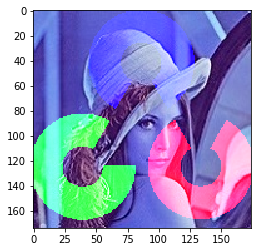

In [499]:
plt.imshow(img)

### cv2.addWeighted()

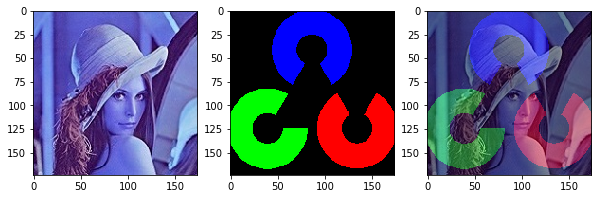

In [500]:
# if alpha = 1 and beta = 1, then equal to add two images
# dst=α×img1+β×img2+γ
alpha = 0.6
beta = 0.4
y = 0
res = cv2.addWeighted(img1, alpha, img2, beta, y)
fig, axes = plt.subplots(1, 3, figsize=(10, 10))
axes[0].imshow(img1)
axes[1].imshow(img2)
axes[2].imshow(res)

### cv2.bitwise_and() & mask

In [501]:
# put the logo on the top left
# roi : top left
rows, cols = img2.shape[:2]
roi = img1big[:rows, :cols]

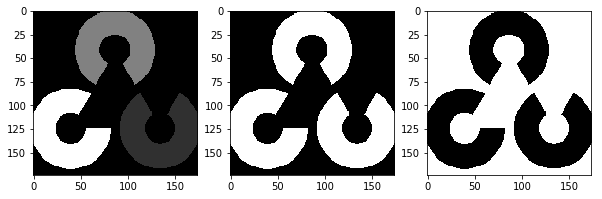

In [502]:
img2gray = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

fig, axes = plt.subplots(1, 3, figsize=(10, 10))
axes[0].imshow(img2gray, 'gray')
axes[1].imshow(mask, 'gray')
axes[2].imshow(mask_inv, 'gray')

In [503]:
# remove backgroup
img1_bg = cv.bitwise_and(roi, roi, mask=mask_inv)
# add
dst = cv2.add(img1_bg, img2)
# copy to img1
img1big[:rows, :cols] = dst

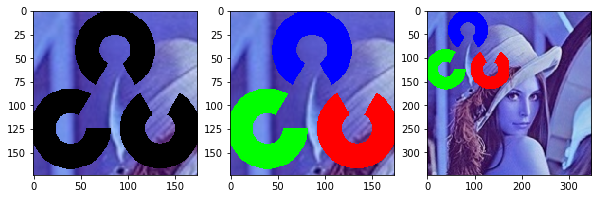

In [504]:
fig, axes = plt.subplots(1, 3, figsize=(10, 10))
axes[0].imshow(img1_bg, 'gray')
axes[1].imshow(dst, 'gray')
axes[2].imshow(img1big, 'gray')